## 2.1 使用PyTorch的Embedding Layer
PyTorch平台有Embedding Layer，可以在完成任务（如文档分类、词性标注、情感分析等）的同时学习词嵌入。具体实现步骤大致如下：  
1）准备语料库；  
2）预处理语料库，得到由不同单词构成的字典，字典包括各单词及对应索引；  
3）构建网络，把Embedding Layer作为第一层，先初始化对应的权重矩阵（即查询表）；  
4）训练模型，训练过程中将不断更新权重矩阵。  
这些步骤可以表示成如图2-1 所示的流程图。	  			 
图2-1 通过任务学习词嵌入的一般步骤  
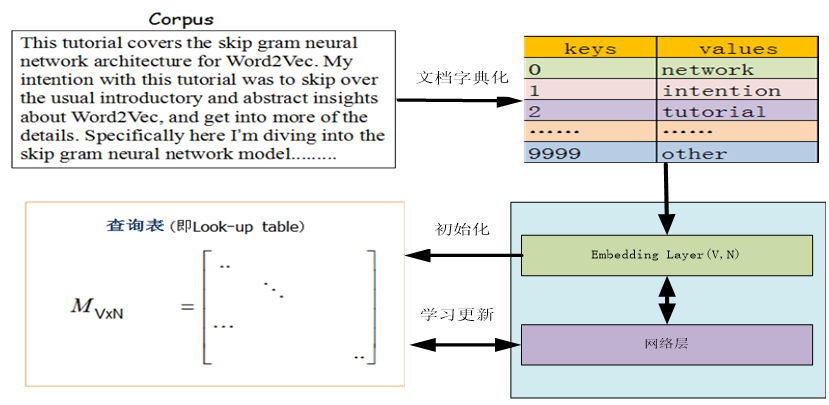

## 2.1.1 如何使用Embedding Layer
    使用Embedding layer的主要目标是把一个张量（Tensor）转换为词嵌入或Embedding格式，其语法格式如下：    
torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None)


## 2.1.2 Embedding Layer简单实例
前面简单介绍了Embedding 层的使用方法，这里通过一个简单实例来说明如何使用。
假设共有10个单词，对应索引为0到9，现从10个单词选择6个不同单词，分两个批次，构成一个数组[[1,2,4,5],[4,3,2,9]]。  
1）定义查询表的形状为10x3，具体代码如下。

In [1]:
import torch
import torch.nn as nn

embedding = nn.Embedding(10, 3)

2）查看Embedding初始化权重信息。

In [2]:
embedding.weight

Parameter containing:
tensor([[-0.6751, -0.8823, -0.3813],
        [-0.0103, -0.3066, -0.0317],
        [ 0.0796, -0.2585, -0.8922],
        [ 0.7915, -0.2426,  0.5770],
        [-0.0854, -0.3170,  0.5728],
        [ 0.5197, -0.2250, -2.6086],
        [ 0.8322,  1.7055,  1.3036],
        [-0.8374, -1.6281, -0.3355],
        [ 1.1972, -0.7288,  0.6805],
        [-0.1795,  0.7122, -0.0853]], requires_grad=True)

从结果可以看出，weight这个权重矩阵是可学习的（因requires_grad=True），且满足标准正态分布（具体原因将在2.1.2说明）。  
3）定义输入，具体代码如下。


In [3]:
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])

4）最后，把输入中的每个词（这里对应每个索引）转换为词嵌入：

In [4]:
embedding(input)

tensor([[[-0.0103, -0.3066, -0.0317],
         [ 0.0796, -0.2585, -0.8922],
         [-0.0854, -0.3170,  0.5728],
         [ 0.5197, -0.2250, -2.6086]],

        [[-0.0854, -0.3170,  0.5728],
         [ 0.7915, -0.2426,  0.5770],
         [ 0.0796, -0.2585, -0.8922],
         [-0.1795,  0.7122, -0.0853]]], grad_fn=<EmbeddingBackward>)

## 2.1.3 Embedding Layer初始化
前面我们通过一个简单实例了解了Embedding Layer的使用方法，那么，Embedding Layer是如何初始化权重矩阵（即查询表）的呢？可以通过查看其对应源代码理解其实现原理。  
1）nn.Embedding层对应的类的源码如下：  

从代码中可以看出，更新weight时主要使用了实例方法self.reset_parameters()，而实例方法又调用了初始化（init）模块中的normal_方法，那么，初始化模块中normal_方法是如何实现的呢？
	打开nn目录下的init.py文件，可以看到normal_函数的定义，具体如下。


结合代码，我们可以推出weight矩阵初始化符合标准正态分布。更多细节可以访问PyTorch官网：https://github.com/pytorch/pytorch/。

## 2.2使用TensorFlow2.0的Embedding Layer
PyTorch平台对词嵌入有对应的网络层，同样TensorFlow平台也有对应的网络层。
## 2.2.1 TensorFlow2.0的Embedding Layer语法格式
tf.keras.layers.Embedding(
input_dim, output_dim, embeddings_initializer='uniform',
embeddings_regularizer=None, activity_regularizer=None,
embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs
)



## 2.2.2TensorFlow2.0的Embedding Layer简单实例
1）定义一个语料，代码如下：

In [5]:
corpus=[
  ["The", "weather", "will", "be", "nice", "tomorrow"],
  ["How", "are", "you", "doing", "today"],
  ["Hello", "world", "!"]
]

2）导入需要的模块。

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np


3）生成一个字典。

In [7]:
#获取语料不同单词，并过滤"!"
word_set=set([i for item in corpus for i in item if i!='!']) 
word_dicts={}
#索引从1开始，0用来填充
j=1
for i in word_set:
    word_dicts[i]=j 
    j=j+1


4）用索引表示语料。

In [8]:
raw_inputs=[]
for i in range(len(corpus)):
    raw_inputs.append([word_dicts[j]  for j in corpus[i] if j!="!"])
    padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,padding='post')
    print(padded_inputs)


[[12  1  9 10  4 11]]
[[12  1  9 10  4 11]
 [13  5  6  2  3  0]]
[[12  1  9 10  4 11]
 [13  5  6  2  3  0]
 [ 8  7  0  0  0  0]]


5）构建网络。

In [9]:
model = Sequential()
model.add(Embedding(20, 4, input_length=6,mask_zero=True))
model.compile('rmsprop', 'mse')
output_array = model.predict(padded_inputs)
output_array.shape

(3, 6, 4)

6）查看运行结果。

In [10]:
output_array[1]

array([[ 0.01992052, -0.03059454,  0.02061294, -0.02918569],
       [-0.00260543, -0.01630479, -0.03188983, -0.03217353],
       [-0.04201949,  0.02864127,  0.02306717, -0.04957166],
       [-0.02667595,  0.00164744,  0.02934103, -0.04434503],
       [-0.03097173, -0.04254374, -0.02425282,  0.01007026],
       [ 0.02717323, -0.04821406, -0.02624477, -0.01104147]],
      dtype=float32)

更多使用方法可参考TensorFlow官网：https://www.tensorflow.org/tutorials/text/word_embeddings